In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/AML sentiment analysis/Tweets.csv")

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df.shape

(14640, 15)

In [ ]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
df=df[['tweet_id', 'text', 'airline_sentiment']]

In [ ]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
df.head()

,tweet_id,text,airline_sentiment
0,570306133677760513,@VirginAmerica What @dhepburn said.,neutral
1,570301130888122368,@VirginAmerica plus you've added commercials t...,positive
2,570301083672813571,@VirginAmerica I didn't today... Must mean I n...,neutral
3,570301031407624196,@VirginAmerica it's really aggressive to blast...,negative
4,570300817074462722,@VirginAmerica and it's a really big bad thing...,negative


In [ ]:
len(df['tweet_id'])-len(df['tweet_id'].drop_duplicates())

155

In [ ]:
df=df.drop_duplicates(subset=['tweet_id'])

In [ ]:
print(df.shape)
print(df.head())


(14485, 3)
             tweet_id                                               text  \
0  570306133677760513                @VirginAmerica What @dhepburn said.   
1  570301130888122368  @VirginAmerica plus you've added commercials t...   
2  570301083672813571  @VirginAmerica I didn't today... Must mean I n...   
3  570301031407624196  @VirginAmerica it's really aggressive to blast...   
4  570300817074462722  @VirginAmerica and it's a really big bad thing...   

  airline_sentiment  
0           neutral  
1          positive  
2           neutral  
3          negative  
4          negative  


In [ ]:
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
def preprocess_text(text):
    # Remove punctuations and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Single character removal
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Removing multiple spaces
    text = re.sub(r'\s+', ' ', text)

    # Converting to Lowercase
    text = text.lower()

    # Lemmatization
    text = text.split()
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text
df['text'] = df['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df['text']

0                              virginamerica dhepburn said
1        virginamerica plus added commercial experience...
2        virginamerica today must mean need take anothe...
3        virginamerica really aggressive blast obnoxiou...
4                       virginamerica really big bad thing
                               ...                        
14635       americanair thank got different flight chicago
14636    americanair leaving minute late flight warning...
14637    americanair please bring american airline blac...
14638    americanair money change flight answer phone s...
14639    americanair ppl need know many seat next fligh...
Name: text, Length: 14485, dtype: object

In [ ]:
df.shape
# sklearn for preprocessing and machine learning models
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics  import accuracy_score
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# XGBoost for Machine Learning (Gradient Boosting Machine (GBM))
import xgboost as xgb

# Keras for neural networks
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers import Flatten
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Random seeds for consistent results
seed = 1234
np.random.seed(seed)

In [ ]:
X=df['text']
y=df['airline_sentiment']
X=X.values.reshape(-1,1)
y=y.values.reshape(-1,1)

In [ ]:
print(X.shape)
print(y.shape)

(14485, 1)
(14485, 1)


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
ros = RandomOverSampler()
X, y= ros.fit_resample(X, y)

In [ ]:
print(X.shape)
print(y.shape)

(27246, 1)
(27246,)


In [ ]:
y=y.reshape(-1,1)
#print()

#Vectorization using TF-IDF

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
ros = RandomOverSampler()
X, y = ros.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.3,train_size=0.7)
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test,test_size = 0.5,train_size =0.5)

In [ ]:
X_train = vectorizer.fit_transform(X_train.ravel())
X_val = vectorizer.transform(X_val.ravel())
X_test = vectorizer.transform(X_test.ravel())
#X_test=vectorizer.fit_transform(X_test.ravel())

In [ ]:
print(f'Training size: {X_train.shape[0]} tweets\n\
Validation size: {X_val.shape[0]} tweets\n\
Test size: {X_test.shape[0]} tweets\n\
Amount of words (columns): {X_train.shape[1]} words')

Training size: 19072 tweets
Validation size: 4087 tweets
Test size: 4087 tweets
Amount of words (columns): 11077 words


In [ ]:
print(X_train.shape)
print(y_train.shape)

(19072, 11077)
(19072,)


#Multinomial Naive Bayes

In [ ]:
multi_nb = MultinomialNB()
multi_nb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
test_pred = multi_nb.predict(X_test)
val_pred = multi_nb.predict(X_val)
print(f'Accuracy on test set (MultinomialNB): {round(accuracy_score(y_test, test_pred)*100, 4)}%')
print(f'Accuracy on validation set (MultinomialNB): {round(accuracy_score(y_val,val_pred)*100, 4)}%')

Accuracy on test set (MultinomialNB): 82.1874%
Accuracy on validation set (MultinomialNB): 82.53%



Classification Report on Test Set:
              precision    recall  f1-score   support

    negative       0.79      0.85      0.82      1406
     neutral       0.83      0.73      0.78      1348
    positive       0.85      0.89      0.87      1333

    accuracy                           0.82      4087
   macro avg       0.82      0.82      0.82      4087
weighted avg       0.82      0.82      0.82      4087


Confusion Matrix on Test Set:


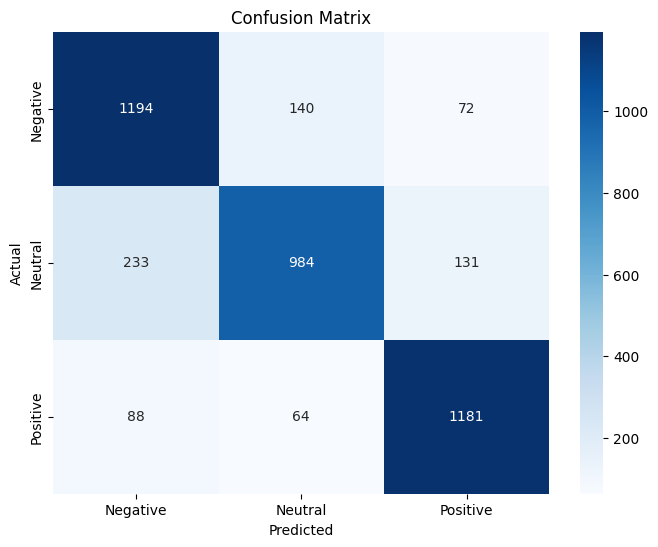

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Print classification report
print("\nClassification Report on Test Set:")
print(classification_report(y_test, test_pred))

# Print confusion matrix
print("\nConfusion Matrix on Test Set:")
conf_matrix = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
#print(confusion_matrix(y_test, test_pred))

#Gradient Boosting

In [ ]:
# sklearn's Gradient Boosting Classifier (GBM)
gbm = GradientBoostingClassifier(n_estimators=200,
                                 max_depth=6,
                                 random_state=seed)
gbm.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=6, n_estimators=200, random_state=1234)

In [ ]:
# Check results
test_pred = gbm.predict(X_test)
val_pred = gbm.predict(X_val)
print(f'Accuracy on test set (GBM): {round(accuracy_score(y_test, test_pred)*100, 4)}%')
print(f'Accuracy on validation set (GBM): {round(accuracy_score(y_val,val_pred)*100, 4)}%')

Accuracy on test set (GBM): 81.1353%
Accuracy on validation set (GBM): 82.0406%



Classification Report on Test Set:
              precision    recall  f1-score   support

    negative       0.87      0.75      0.81      1406
     neutral       0.72      0.86      0.79      1348
    positive       0.87      0.82      0.84      1333

    accuracy                           0.81      4087
   macro avg       0.82      0.81      0.81      4087
weighted avg       0.82      0.81      0.81      4087


Confusion Matrix on Test Set:


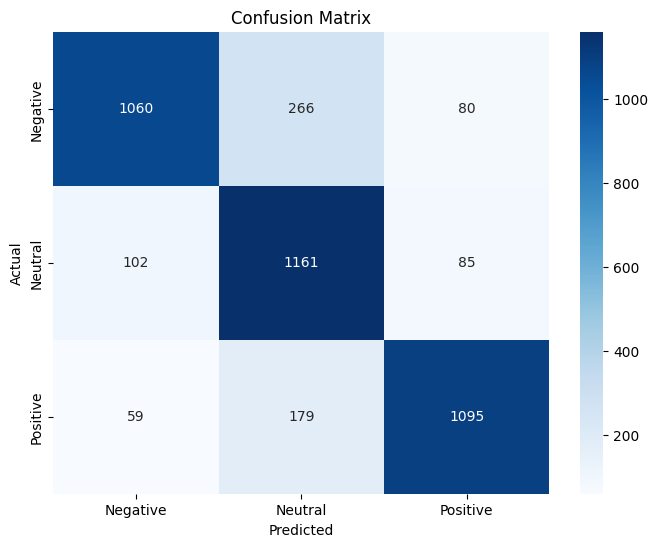

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Print classification report
print("\nClassification Report on Test Set:")
print(classification_report(y_test, test_pred))

# Print confusion matrix
print("\nConfusion Matrix on Test Set:")
conf_matrix = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
#print(confusion_matrix(y_test, test_pred))

#XgBoost

In [ ]:
xgb_params = {'objective' : 'multi:softmax',
              'eval_metric' : 'mlogloss',
              'eta' : 0.1,
              'max_depth' : 6,
              'num_class' : 3,
              'lambda' : 0.8,
              'estimators' : 200,
              'seed' : seed

}

from sklearn.preprocessing import LabelEncoder

# Transform categories into numbers
label_encoder = LabelEncoder()
target_train = label_encoder.fit_transform(y_train)
target_val = label_encoder.transform(y_val)
target_test = label_encoder.transform(y_test)

# Transform categories into numbers
# negative = 0, neutral = 1 and positive = 2
#target_train = y_train.astype('category').cat.codes
#target_val = y_val.astype('category').cat.codes
#target_test=y_test.astype('category').cat.codes

# Transform data into a matrix so that we can use XGBoost
d_train = xgb.DMatrix(X_train, label = target_train)
d_val = xgb.DMatrix(X_val, label = target_val)
d_test = xgb.DMatrix(X_test, label = target_test)

# Fit XGBoost
watchlist = [(d_train, 'train'), (d_val, 'validation')]
bst = xgb.train(xgb_params,
                d_train,
                400,
                watchlist,
                early_stopping_rounds = 50,
                verbose_eval = 0)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:55:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
test_pred = bst.predict(d_test)
val_pred = bst.predict(d_val)
print(f'Accuracy on testing set (XGBoost): {round(accuracy_score(target_test, test_pred)*100, 4)}%')
print(f'Accuracy on validation set (XGBoost): {round(accuracy_score(target_val, val_pred)*100, 4)}%')

Accuracy on testing set (XGBoost): 82.3342%
Accuracy on validation set (XGBoost): 82.7257%


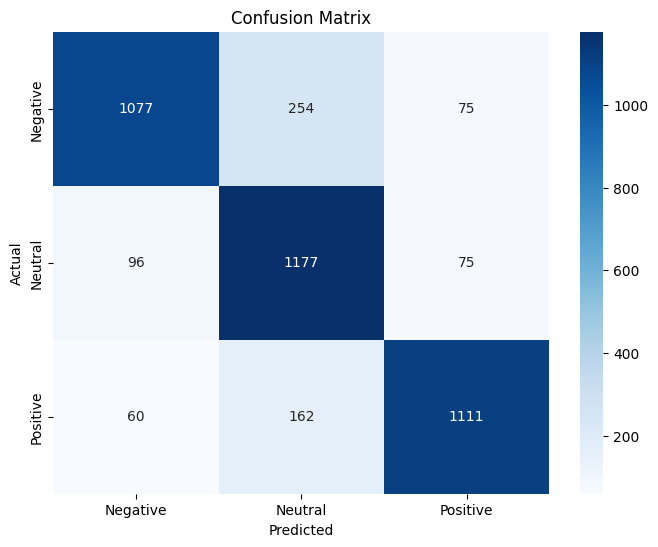

In [ ]:
conf_matrix = confusion_matrix(target_test, test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = bst.predict(d_test)

# Convert predicted labels back to original categories
y_pred_original = label_encoder.inverse_transform(np.round(y_pred).astype(int))

# Convert true labels back to original categories
y_true_original = label_encoder.inverse_transform(target_test)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_original, y_pred_original, average='weighted')
recall = recall_score(y_true_original, y_pred_original, average='weighted')
f1 = f1_score(y_true_original, y_pred_original, average='weighted')

print("\nPrecision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))



Precision: 0.8315
Recall: 0.8233
F1 Score: 0.8242


In [ ]:
from sklearn.metrics import classification_report

class_report = classification_report(y_true_original, y_pred_original, target_names=label_encoder.classes_)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

    negative       0.87      0.77      0.82      1406
     neutral       0.74      0.87      0.80      1348
    positive       0.88      0.83      0.86      1333

    accuracy                           0.82      4087
   macro avg       0.83      0.82      0.82      4087
weighted avg       0.83      0.82      0.82      4087



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import class_weight

In [ ]:
resampler = RandomUnderSampler(random_state=42)
resampled_data, resampled_labels = resampler.fit_resample(df['text'].to_frame(), df['airline_sentiment'])

# Split the resampled dataset
X_train_resampled, X_temp_resampled, y_train_resampled, y_temp_resampled = train_test_split(
    resampled_data, resampled_labels, test_size=0.3, random_state=42)
X_val_resampled, X_test_resampled, y_val_resampled, y_test_resampled = train_test_split(
    X_temp_resampled, y_temp_resampled, test_size=0.5, random_state=42)

# Label encoding
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
y_train_resampled = [label_mapping[label] for label in y_train_resampled]
y_val_resampled = [label_mapping[label] for label in y_val_resampled]

X_train_resampled = X_train_resampled.iloc[:, 0]
X_val_resampled = X_val_resampled.iloc[:, 0]
X_test_resampled = X_test_resampled.iloc[:, 0]

print(type(X_train_resampled))

<class 'pandas.core.series.Series'>


In [ ]:
# Convert labels to one-hot encoded format
y_train_encoded = to_categorical(y_train_resampled, num_classes=3)
y_val_encoded = to_categorical(y_val_resampled, num_classes=3)

# Vectorize the text data using pre-processed TF-IDF values
max_words = 6000  # Set to the number of TF-IDF features
vectorizer = TfidfVectorizer(max_features=max_words)
X_train_resampled = vectorizer.fit_transform(X_train_resampled.ravel()).toarray()  # Convert to dense matrix
X_val = vectorizer.transform(X_val_resampled.ravel()).toarray()  # Convert to dense matrix
X_test = vectorizer.transform(X_test_resampled).toarray()  # Convert to dense matrix


In [ ]:
# Define a simpler model with regularization
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=max_words))
model.add(Dense(64, activation='relu', input_dim=max_words))
#model.add(Dense(16, activation='relu', input_dim=max_words))
model.add(Dropout(0.5))  # Increased dropout for regularization
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
batch_size = 32
epochs = 20  # Increased number of epochs
history = model.fit(X_train, y_train_encoded, validation_data=(X_val, y_val_encoded), epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[early_stopping])

# Evaluate the model on the test set
y_test_encoded = to_categorical([label_mapping[label] for label in y_test_resampled], num_classes=3)
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/20
154/154 [==============================] - 2s 7ms/step - loss: 1.0327 - accuracy: 0.5262 - val_loss: 0.8474 - val_accuracy: 0.6752
Epoch 2/20
154/154 [==============================] - 1s 4ms/step - loss: 0.6816 - accuracy: 0.7488 - val_loss: 0.6414 - val_accuracy: 0.7429
Epoch 3/20
154/154 [==============================] - 1s 6ms/step - loss: 0.4261 - accuracy: 0.8615 - val_loss: 0.6549 - val_accuracy: 0.7381
Epoch 4/20
154/154 [==============================] - 1s 7ms/step - loss: 0.2919 - accuracy: 0.9104 - val_loss: 0.7004 - val_accuracy: 0.7333
Epoch 5/20
33/33 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.7003
Test Accuracy: 0.7002854347229004


33/33 [==============================] - 0s 3ms/step


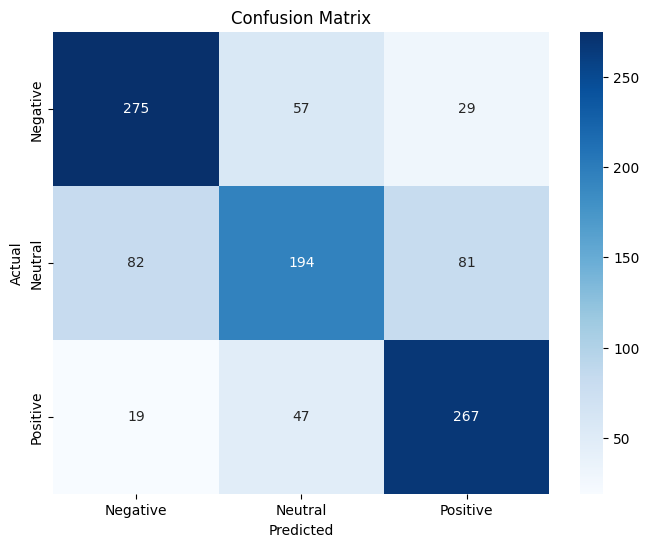


Precision: 0.6967
Recall: 0.7003
F1 Score: 0.6958
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.76      0.75       361
           1       0.65      0.54      0.59       357
           2       0.71      0.80      0.75       333

    accuracy                           0.70      1051
   macro avg       0.70      0.70      0.70      1051
weighted avg       0.70      0.70      0.70      1051



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Reverse the label mapping for converting predicted labels back to original categories
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

# Convert predicted labels back to original categories
y_pred_original = [reverse_label_mapping[np.argmax(pred)] for pred in y_pred]

# Convert true labels back to original categories as integers
y_true_original = np.array([label_mapping[label] for label in y_test_resampled])

# Convert predicted labels back to original categories as integers
y_pred_original = np.array([label_mapping[label] for label in y_pred_original])

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_original, y_pred_original)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_original, y_pred_original, average='weighted')
recall = recall_score(y_true_original, y_pred_original, average='weighted')
f1 = f1_score(y_true_original, y_pred_original, average='weighted')

print("\nPrecision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))
from sklearn.metrics import classification_report

class_report = classification_report(y_true_original, y_pred_original)  # Remove target_names parameter
print("Classification Report:\n", class_report)
